## Project: Investigating TMDB Movies Dataset

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
### Introduction

> As a part of Udacity's Investigate a dataset project, I will be analysing 'TMDb movies dataset' downloaded from Kaggle. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

> **Questions that I have analysed using this dataset:**
>
>- The most profit and loss making movies?
>
>- Movie with the highest & the lowest budget?
>
>- Movie with the highest & the lowest rating?
>
>- The most and the least popular movie?¶
>
>- How are budget, revenue, profit, popularity and ratings correlated to each other?¶
>
>- How has the profitability of movies changed over years?
>
>- How has the voter ratings of a movie changed over the years?
>
>- Average runtime of all movies?
>
>- Are movies with higher ratings longer in duration?
>
>- Actors with the most appearances?
>
>- Which actors tend to make more popular movies?
>
>- Most common genres?

In [1]:
# Importing all the packages that will be needed throughout the notebook.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

> Setting the parameters like font size, figure size to be used in visualizations during EDA.

In [2]:
mpl.rcParams['font.size'] = 11
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 13
mpl.rcParams['xtick.labelsize'] = 11
mpl.rcParams['ytick.labelsize'] = 11
mpl.rcParams['figure.titlesize'] = 13

<a id='wrangling'></a>
## Data Wrangling

> Importing the dataset & observing it. Performing data cleaning to look for instances of missing or possibly errant data. Keeping only the data required to analyze research questions & removing unnecessary data.

### General Properties

In [3]:
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [4]:
df.shape

(10866, 21)

> The database has 10866 rows and 21 columns. Considering the header, the database has entries of 10865 movies.
>
>Below are the column names:

In [5]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> Above data has a significant number of null values (missing data). And the datatypes of certain columns are also wrong.

### Data Cleaning

> **Objectives**
> - Deleting unwanted columns. 
> - Finding and removing duplicate rows.
> - Finding missing values and replacing with appropriate data or NaN.
> - Converting datatype of 'release_date' and 'release_year'.

In [7]:
# Checking for instances of missing values
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> **1. Deleting unwanted columns** (most having a significant amount of missing values)

In [8]:
drop_cols = ['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'production_companies', 'overview']
df.drop(drop_cols, axis=1, inplace=True)

> **2. Removing duplicate data**

In [9]:
# checking for total duplicate entries
df.duplicated().sum()

1

In [10]:
df[df.duplicated(keep=False)]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,110,5.0,2010,30000000.0,967000.0


> The dataset has 1 duplicate entry for movie Tekken. Deleting duplicates

In [11]:
df.drop_duplicates(keep='first', inplace=True)

> **3. Replacing zeros with NaN and dropping the NaN values** (in order to get accurate descriptive statistics)

In [12]:
nan_cols = ['budget', 'revenue', 'runtime', 'budget_adj', 'revenue_adj']
df[nan_cols] = df[nan_cols].replace(0, np.nan)

df.dropna(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      3849 non-null   float64
 1   budget          3849 non-null   float64
 2   revenue         3849 non-null   float64
 3   original_title  3849 non-null   object 
 4   cast            3849 non-null   object 
 5   director        3849 non-null   object 
 6   runtime         3849 non-null   float64
 7   genres          3849 non-null   object 
 8   release_date    3849 non-null   object 
 9   vote_count      3849 non-null   int64  
 10  vote_average    3849 non-null   float64
 11  release_year    3849 non-null   int64  
 12  budget_adj      3849 non-null   float64
 13  revenue_adj     3849 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 451.1+ KB


> Datatype of 'budget', 'revenue' and 'runtime' columns was changed to float while executing above steps
>
> **4. Converting datatype of these cols back to int**

In [14]:
df[nan_cols] = df[nan_cols].astype('int')

> **5. Changing format of 'release_date' column to datetime**

In [15]:
df['release_date'] = pd.to_datetime(df['release_date'])

> Now, are left with 3848 entries of the movies database to do our analysis on.

<a id='eda'></a>
## Exploratory Data Analysis

> Descriptive statistics about the dataset.

In [16]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3849.000000,3.849000e+03,3.849000e+03,3849.000000,3849.000000,3849.000000,3849.000000,3.849000e+03,3.849000e+03
mean,1.192933,3.724886e+07,1.078148e+08,109.217459,528.387114,6.168693,2001.258249,4.429360e+07,1.372313e+08
std,1.475622,4.221699e+07,1.766175e+08,19.914141,880.333629,0.794697,11.285642,4.481360e+07,2.162018e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,0.000000e+00,2.000000e+00
25%,0.463337,1.000000e+07,1.367069e+07,95.000000,71.000000,5.700000,1995.000000,1.316623e+07,1.843023e+07
50%,0.798582,2.400000e+07,4.490726e+07,106.000000,205.000000,6.200000,2004.000000,3.005030e+07,6.181393e+07
75%,1.374300,5.000000e+07,1.243052e+08,119.000000,581.000000,6.700000,2010.000000,6.076720e+07,1.634115e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


> Calculating profit and adjusted profit of all movies.

In [17]:
df['profit'] = df['revenue'] - df['budget']
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']
df.insert(3, 'profit', df.pop('profit'))

### Research Question 1.1 - The most profit and loss making movies?

In [18]:
def minmax(col):
    max_df = pd.DataFrame(df.loc[df[col].idxmax(),:])
    min_df = pd.DataFrame(df.loc[df[col].idxmin(),:])
    return_df = pd.concat([max_df, min_df], axis=1, ignore_index=True)
    return_df.columns = ['Highest', 'Lowest']
    return return_df.loc[['original_title', 'release_year', col]]

In [19]:
minmax('profit')

,Highest,Lowest
original_title,Avatar,The Warrior's Way
release_year,2009,2010
profit,2544505847,-413912431


In [20]:
minmax('profit_adj')

,Highest,Lowest
original_title,Star Wars,The Warrior's Way
release_year,1977,2010
profit_adj,2750136651,-413912431


> *(Note: The above results/data seemed a bit inaccurate for the movie 'The Warrior's Way'. A quick google search showed that the budget of the movie was 42.5 million and not 425 million. So let's correct that in the dataframe.)*

In [21]:
warrior_idx = df[df['original_title']=='The Warrior\'s Way'].index[0]
df.loc[warrior_idx,'budget'] = 42500000
df.loc[warrior_idx,'budget_adj'] = 42500000

> Recalculating the profit and adjusted profit columns

In [22]:
df['profit'] = df['revenue'] - df['budget']
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']
df.insert(3, 'profit', df.pop('profit'))

> Finding the movies with min and max profit again using the corrected data

In [23]:
minmax('profit')

,Highest,Lowest
original_title,Avatar,The Lone Ranger
release_year,2009,2013
profit,2544505847,-165710090


In [24]:
minmax('profit_adj')

,Highest,Lowest
original_title,Star Wars,The Lone Ranger
release_year,1977,2013
profit_adj,2750136651,-155110171


> The movie which made the most profit was **Avatar** with a profit of whopping **2.5 billion USD**.
>
> The movie which made the most loss was **The Lone Ranger** with a loss of **165.7 million USD**.
>
> If we consider the monetary values adjusted to inflation, the most profit making movie was **Star Wars** with profit of **2.7 billion USD equivalent to today's date**.
>
> While, the most loss-making movie was the same.

### Research Question 1.2 - Movie with the highest & the lowest budget?

In [25]:
minmax('budget')

,Highest,Lowest
original_title,Pirates of the Caribbean: On Stranger Tides,Lost & Found
release_year,2011,1999
budget,380000000,1


In [26]:
minmax('budget_adj')

,Highest,Lowest
original_title,Pirates of the Caribbean: On Stranger Tides,"Love, Wedding, Marriage"
release_year,2011,2011
budget_adj,368371256,0


> The movie with highest budget was **Pirates of the Caribbean: On Stranger Tides** with budget of **380 million USD**.
>
> The movie with lowest budget was **Lost and Found** with a **1 USD** budget

### Research Question 1.3 - Movie with the highest & the lowest rating?

In [27]:
minmax('vote_average')

,Highest,Lowest
original_title,The Shawshank Redemption,Foodfight!
release_year,1994,2012
vote_average,8.4,2.2


> Movie with best ratings is **The Shawshank Redemption** with **8.4/10**.
>
> Movie with lowest ratings is **Foodfight!** with **2.2/10**.

### Research Question 1.4 - The most and the least popular movie?

In [28]:
minmax('popularity')

,Highest,Lowest
original_title,Jurassic World,Born into Brothels
release_year,2015,2004
popularity,32.985763,0.001117


> **Jurassic World** is the most popular movie, whereas **Born into Brothels** is the least popular one.

### Research Question 2 - How are budget, revenue, profit, popularity and ratings correlated to each other?

In [29]:
# setting the plotting style
sns.set_style('darkgrid')

<Figure size 936x936 with 0 Axes>

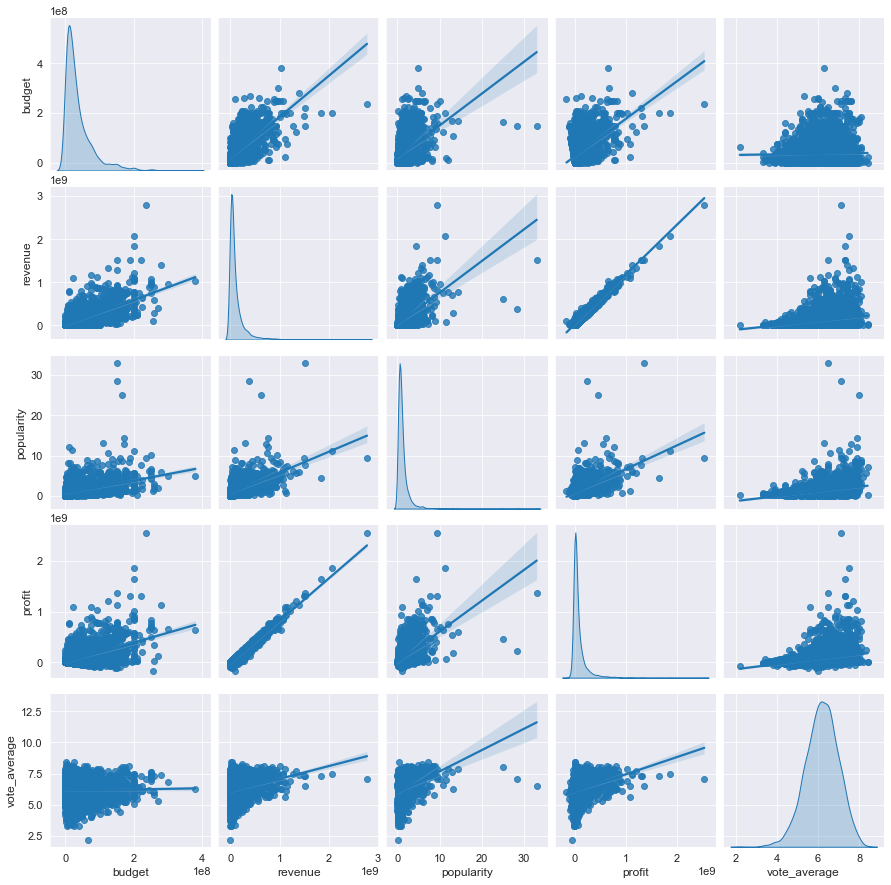

In [30]:
corr_df = df[['budget','revenue','popularity','profit','vote_average']]
fig = plt.figure(figsize=(13,13));
sns.pairplot(corr_df, kind="reg", diag_kind="kde")
plt.show()

> Above scatter plots show that there is a positive corelation between budget - profit, budget - popularity, ratings - profit etc  So, the movies with more budget tend to be more popular and profitable.

### Research Question 3 - How has the profitability of movies changed over years?

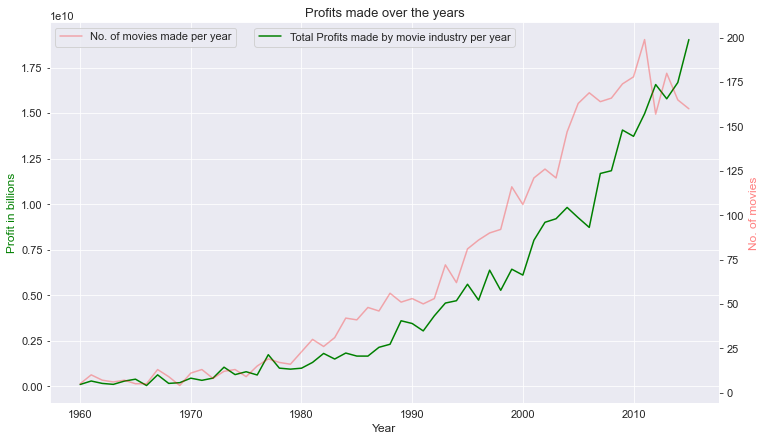

In [31]:
# plotting
fig, ax = plt.subplots(figsize=(12,7))

ax.plot(df.groupby('release_year')['profit'].sum(),color='green', label= 'Total Profits made by movie industry per year')
ax.set_xlabel('Year')
ax.set_ylabel('Profit in billions', color='green')
ax.set_title('Profits made over the years')
ax.legend(loc=9)

ax2 = ax.twinx()
ax2.plot(df.groupby('release_year')['profit'].count(), color='red',alpha=0.3, label= 'No. of movies made per year')
ax2.set_ylabel('No. of movies', color='red', alpha=0.5)
ax2.grid(None)
ax2.legend(loc=0)
plt.show()


> Profit made per year by the movie industry has increased drastically over the years. This is primarily because the no. of movies made per year has also increased.
>
> So, to get a trend showing the 'profitability' of a movie per year, we plot the average profit made by a movie in a particular year. 

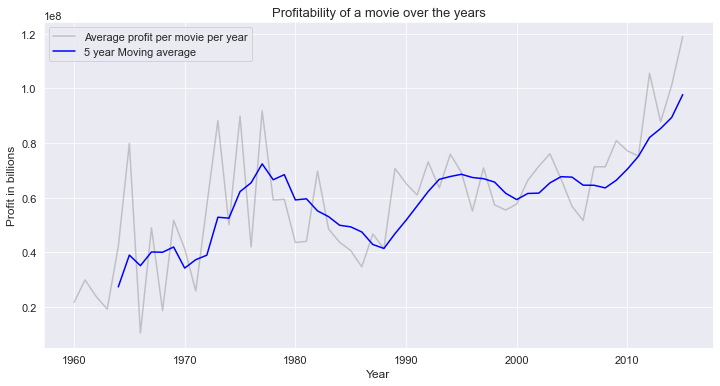

In [32]:
a = df.groupby('release_year')['profit'].mean()
b = a.rolling(window=5).mean()

# plotting
fig = plt.figure(figsize=(12,6))
plt.plot(a.index, a.values, c='gray', alpha=0.4, label = 'Average profit per movie per year')
plt.plot(b.index, b.values, c='blue', label = '5 year Moving average')
plt.legend()
plt.title('Profitability of a movie over the years')
plt.xlabel('Year')
plt.ylabel('Profit in billions')
plt.show()

> The profitability of a movie has had ups and downs over the years but it has **increased significantly**
compared to 1960s. We took a 5-year moving average to get a smoother trend.

### Research Question 4 - How has the voter ratings of a movie changed over the years?

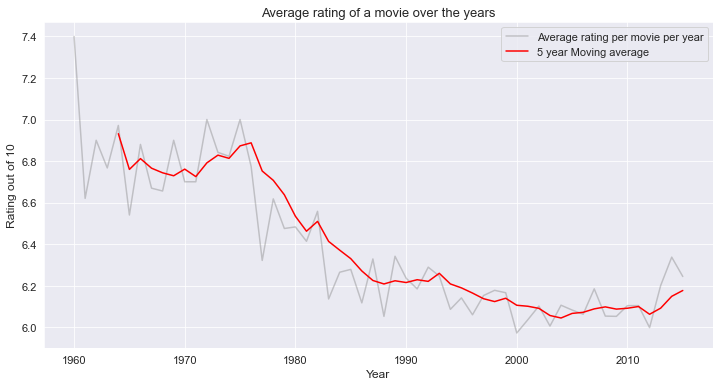

In [33]:
a = df.groupby('release_year')['vote_average'].mean()
b = a.rolling(window=5).mean()

# plotting
fig = plt.figure(figsize=(12,6))
plt.plot(a.index, a.values, c='gray', alpha=0.4, label = 'Average rating per movie per year')
plt.plot(b.index, b.values, c='red', label = '5 year Moving average')
plt.legend()
plt.title('Average rating of a movie over the years')
plt.xlabel('Year')
plt.ylabel('Rating out of 10')
plt.show()

> The average ratings of a movie have **reduced from 7s to 6s** over the years. We took a 5-year moving average to get a smoother trend.

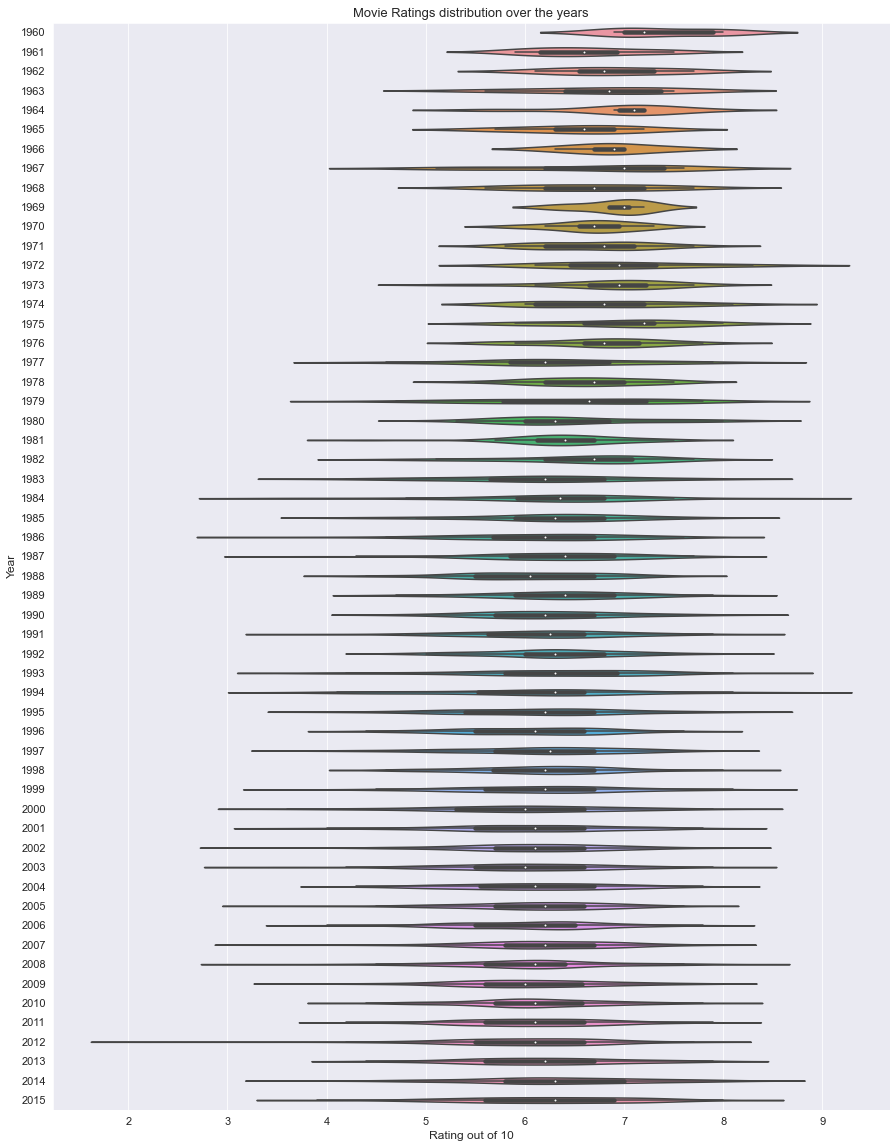

In [34]:
fig = plt.figure(figsize=(15,20))
sns.violinplot(y=df['release_year'], x=df['vote_average'], orient='h')
plt.title('Movie Ratings distribution over the years')
plt.ylabel('Year')
plt.xlabel('Rating out of 10')
plt.show()

> The range of movie ratings given by voters have become more wide on the lower limit side over the years. Varying from 2 to 9 in the 2010s, while just being in between 5 to 9 in 1960s

> ### Research Question 5.1 - Average runtime of all movies?

In [35]:
avg_runtime = df['runtime'].mean()
avg_runtime

109.21745908028059

> Average runtime is 109.2 minutes. Let's visualize to see the distribution using histogram and box-plot.

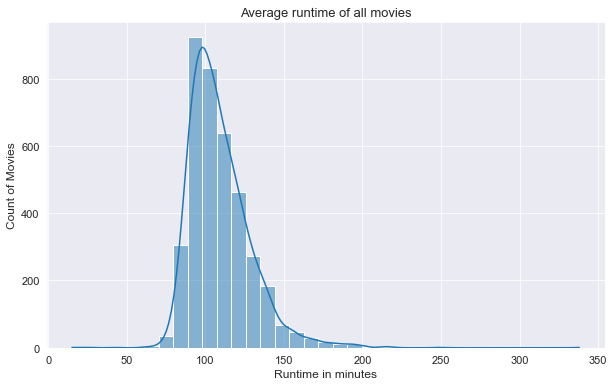

In [36]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['runtime'], bins=35, kde=True).set_title('Average runtime of all movies', fontsize=13)
plt.xlabel('Runtime in minutes')
plt.ylabel('Count of Movies')
plt.show()

> The distribution of runtime is right-skewed. Most of the movies have a runtime of 80-140 minutes. Below box-plot also shows a similar trend.

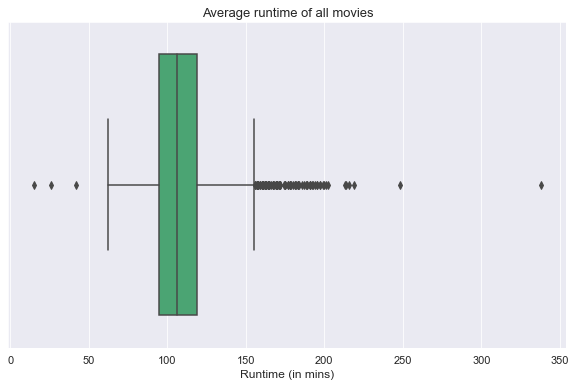

In [37]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x=df['runtime'],  color='mediumseagreen').set_title('Average runtime of all movies')
plt.xlabel('Runtime (in mins)')
plt.show()

### Research Question 5.2 - Are movies with higher ratings longer in duration?

> To visualize this trend we will categorize the ratings in 10 bins. [0.5,1.5) as 1, [1.5,2.5) as 2 and so on upto 10

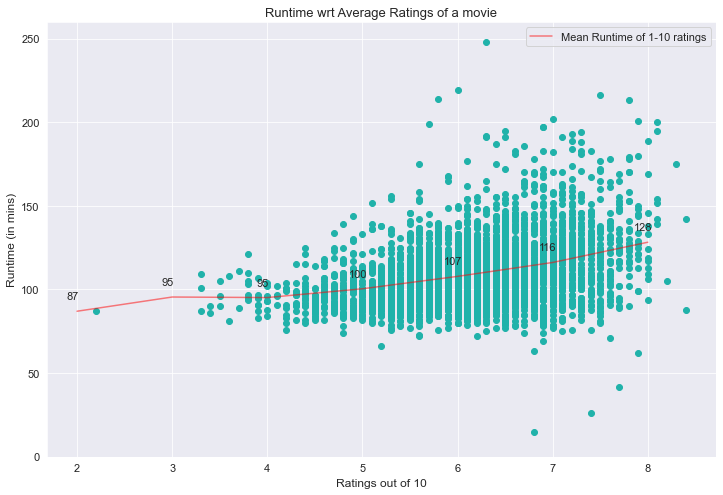

In [69]:
df['ratings'] = pd.cut(df['vote_average'],bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5], 
                       labels = [1,2,3,4,5,6,7,8,9,10])
a = df.groupby('ratings')['runtime'].mean()

# plotting
fig = plt.figure(figsize=(12,8))
plt.scatter(df['vote_average'], df['runtime'],color='lightseagreen', alpha=1)
plt.plot(a.index, a.values, color='red', alpha=0.5, label='Mean Runtime of 1-10 ratings')
plt.ylim(0, 260)
plt.title('Runtime wrt Average Ratings of a movie')
plt.xlabel('Ratings out of 10')
plt.ylabel('Runtime (in mins)')
plt.legend()

for i,v in enumerate(a):
    try: plt.text(i+0.95, v+7, "%d" %v, ha="center")
    except: continue
plt.show()

> Movies with higher ratings (of 8) tend to have a longer runtime (128 mins on average). While movies with lower ratings have shorter runtime.

### Research Question 6.1 - Actors with the most appearances

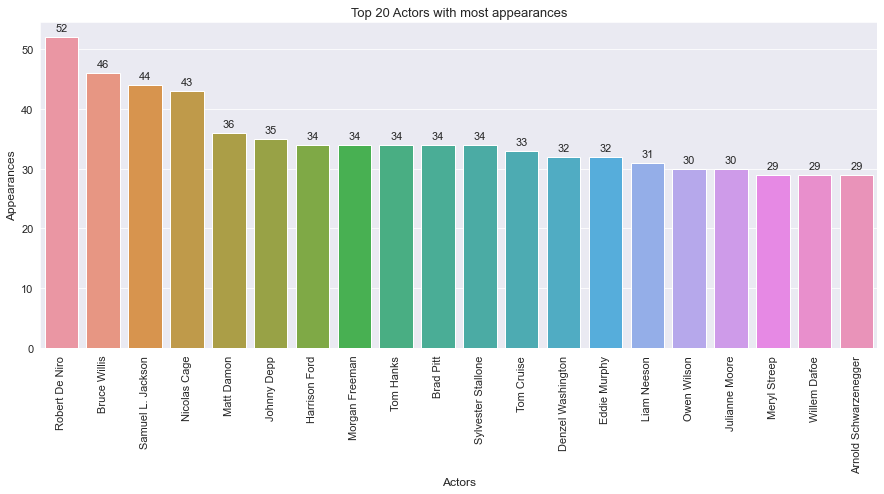

In [39]:
cast = df["cast"].str.cat(sep = '|')
cast_series = pd.Series(cast.split('|'))
top_actors = cast_series.value_counts()[0:20]

# plotting
fig = plt.figure(figsize=(15,6))
ax = sns.barplot(x=top_actors.index, y=top_actors.values).set_title('Top 20 Actors with most appearances')
plt.xticks(rotation ='vertical')
plt.xlabel('Actors')
plt.ylabel('Appearances')

for i,v in enumerate(top_actors.values):
    try: plt.text(i, v+1, "%d" %v, ha="center")
    except: continue
plt.show()

> Robert De Niro has starred in the most number of movies.

 ### Research Question 6.2 - Which actors tend to make more popular movies?

> In our dataframe, the names of all the actors for a movie are in a single cell in column 'cast'. We need to clean the data and split 'cast' into different columns. So that the columns with actors can be iterable.

In [40]:
actors_df = df[['original_title','popularity','cast']]
actors_df.insert(3, 'cast_split', actors_df["cast"].str.split('|'))
actors_df = actors_df.reset_index().drop('index',axis=1)

for i in range(0,len(actors_df)):
    size = len(actors_df.iloc[i]['cast_split'])
    col = 1
    for actor in actors_df.iloc[i]['cast_split']:
        actors_df.loc[i, col] = actor
        if col < (size): col += 1
        else: col = 1
actors_df.head()

,original_title,popularity,cast,cast_split,1,2,3,4,5
0,Jurassic World,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,Mad Max: Fury Road,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,Insurgent,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,"[Shailene Woodley, Theo James, Kate Winslet, A...",Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,Star Wars: The Force Awakens,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,Furious 7,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


> Here, a different dataframe is made for all the movies with its actors in separate columns. Now, for each actor, we will calculate the popularity of all movies he/she/they have been into. 

In [41]:
list1 = []
list2 = []
for i in range(0,3849):
    x = actors_df.loc[i,'popularity']
    for actor in actors_df.loc[i,[1,2,3,4,5]]:
        list1.append(actor) 
        list2.append(x)

pop_df = pd.DataFrame()
pop_df['actors_instances'] = list1
pop_df['popularity_instances'] = list2
pop_df.dropna(inplace=True)

d = pop_df.groupby('actors_instances')['popularity_instances'].sum().sort_values(ascending=False)[0:20]

> Let's plot the top 20 actors with most popular movies.

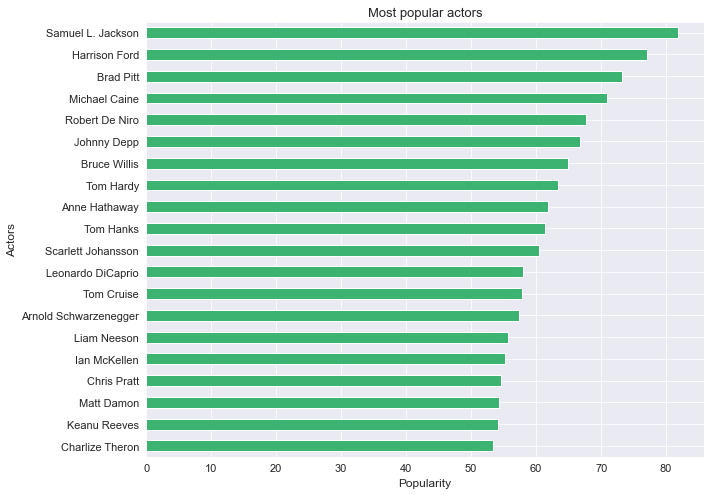

In [42]:
# plotting
d.plot.barh(figsize=(10,8), color='mediumseagreen').invert_yaxis()
plt.xlabel('Popularity')
plt.ylabel('Actors')
plt.title('Most popular actors')
plt.show()

> Casting actors from above list will have a high chances of making the movie popular.

### Research Question 7 - Most common Genres

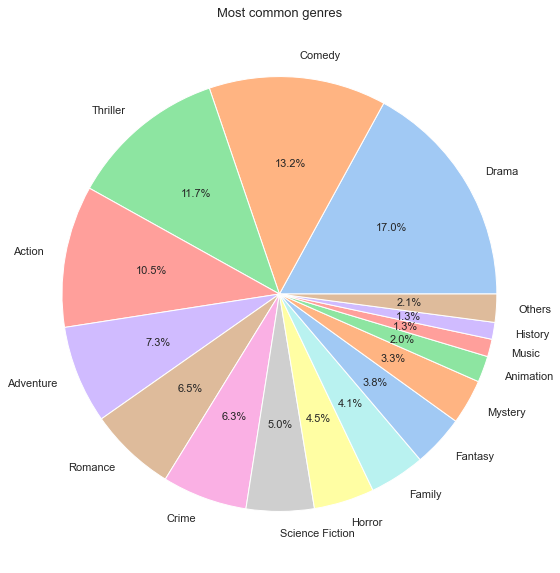

In [43]:
genres = df["genres"].str.cat(sep = '|')
genres_series = pd.Series(genres.split('|'))
top_genres = genres_series.value_counts()
top_genres['Others'] = top_genres[15:20].sum()
top_genres.drop(top_genres[15:20].index, axis=0, inplace=True)

# plotting
fig = plt.figure(figsize=(10,10))
colors = sns.color_palette('pastel')[0:16]
plt.pie(top_genres, colors= colors, autopct="%2.1f%%", labels=top_genres.index);
plt.title('Most common genres')
plt.show()

> The most common genres are Drama, Comedy, Thriller, Action with each having more than 10% share in the total number of movies made.

<a id='conclusions'></a>
## Conclusions

> Analysing the TMDB database gave a lot of insights. We came out with some very interesting facts about movies:
>
> - 'Avatar' was the most profit making movie, while 'The Lone Ranger' was the most loss-making. If we considered profit values adjusted to inflation, 'Star Wars' was the most profit-making of all time.
> - 'Pirates of the Caribbean: On Stranger Tides' was the costliest movie to be made and 'Lost and Found' is the cheapest.
> - 'The Shawshank Redemption' is the best movie while 'Foodfight!' is the worst.
> - 'Jurassic World' is the most popular among masses, whereas 'Born into Brothels' is the least.
> - Average runtime of all movies is 109 minutes.
> - Robert De Niro, Bruce Wilis, Samuel L Jackson are among the top actors who have starred in the most number of movies.
> - The most common movie genres are Drama, Comedy, Thriller, Action.
>
> Some Conclusions that can be made from the above data analysis are:
> - Movies with more budget tend to make more revenue at the box office, in turn make greater profits and also be more popular. But having more budget doesn't guarantee that movie will get the best voter ratings.
> - Profit made per year by the movie industry has increased drastically over the years. This is primarily because the no. of movies made per year has also increased.
> - The average profitability of a movie has increased significantly over the years. A movie made in 2010s is more likely to be profitable than a movie made in 1970s.
> - Movies have started to get more negative/lower ratings as time have progressed.
> - For a movie to get high ratings, it should be longer in duration (around 128 mins).
> - For a movie to be popular, popular actors like Samuel L Jackson, Harrison Ford, Brad Pitt etc should be cast.

**Limitations**
> - We are not sure if the data provided is completely accurate, as we already faced an instance of inaccurate data pertaining to the movie 'The Warrior's Way' which we had to correct.
>
> - The dataset also had a huge number of missing data. Dropping the rows with missing values affected the overall data analysis as the dataset was reduced to almost 1/3rd in size.
